# MDEO model: Neutrino masses inversion

The idea is to check the neutrino mases inversion to one loop.
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [7]:
import pyslha
import pyMDEO_LesHouches_generator
import neutrino_analytic

### PMNS matrix

In [5]:
#phases of the PMNS matrix and the R 
phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
delta = phases1[0]
eta1 = phases1[1]
eta2 = phases1[2]

#light neutrino masses (up 3 sigma range) NH (NO)
#mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
#Zero in this framework
mnu1 = 1.0e-25
mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1e-18+mnu1**2)
mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1e-18+mnu1**2)

#mixing angles (up 3 sigma range) NH
t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))

#Building PMNS matrix NH
UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))

#Defining the U elementes. readeable
U11 = np.real(U[0,0])
U12 = np.real(U[0,1])
U13 = np.real(U[0,2])
U21 = np.real(U[1,0])
U22 = np.real(U[1,1])
U23 = np.real(U[1,2])
U31 = np.real(U[2,0])
U32 = np.real(U[2,1])
U33 = np.real(U[2,2])

In [6]:
print("mnu1=",mnu1,"mnu2=",mnu2,"mnu3=",mnu3)
#print(U)

mnu1= 1e-25 mnu2= 8.80025239757767e-12 mnu3= 4.9709312544525287e-11


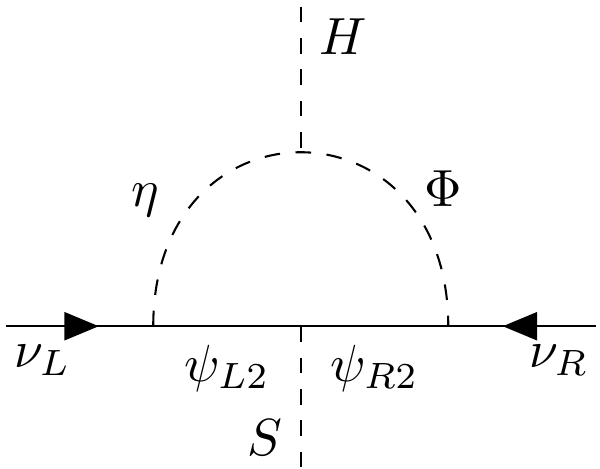

In [6]:
from IPython.display import Image
Image("/home/anferivera/Work/Documents_compartidos/MDEO/neutrino-diagram.png", width=300)

Run diccionary first time

In [8]:
x=[]

import pyslha
import pyMDEO_LesHouches_generator

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

#Modified the xdict elements
#xdict.blocks['SPHENOINPUT'].entries[55]='%i           # Calculate loop corrected masses'%0

#Fermion matrix
Lam1 = 2.225000E-01 
Lam2 = 2.100000E-02
Lam3 = 3.000000E-02
Lam4 = 4.000000E-02
Lam7 = 3.000000E-02
Lam9 = 3.000000E-02
Lam10 = 1.000000E-02
vX = 5.2E3
VEV =246.220569
muC = 4.110000E+02 
MS2 = 4.020000E+08
Mn2 = 4.030000E+08

xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2
xdict.blocks['MINPAR'].entries[3]='%.6E    # lambda3Input'%Lam3
xdict.blocks['MINPAR'].entries[4]='%.6E    # lambda4Input'%Lam4
xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda7Input'%Lam7
xdict.blocks['MINPAR'].entries[9]='%.6E    # lambda9Input'%Lam9
xdict.blocks['MINPAR'].entries[10]='%.6E    # lambda10Input'%Lam10
xdict.blocks['MINPAR'].entries[23]='%.6E    # mEt2Input'%Mn2
xdict.blocks['MINPAR'].entries[24]='%.6E    # MS2Input'%MS2
xdict.blocks['MINPAR'].entries[30]='%.6E    # vXinput'%vX
xdict.blocks['MINPAR'].entries[32]='%.6E    # muCinput'%muC

YX11 = 0.11
YX12 = 0.0011
YX21 = 0.02
YX22 = 0.32
xdict.blocks['YXIN'].entries[1,1]='%.6E    # YX(1,1)'%YX11
xdict.blocks['YXIN'].entries[1,2]='%.6E    # YX(1,2)'%YX12
xdict.blocks['YXIN'].entries[2,1]='%.6E    # YX(2,1)'%YX21
xdict.blocks['YXIN'].entries[2,2]='%.6E    # YX(2,2)'%YX22

#Write the Leshouches file
pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict)

spheno = subprocess.getoutput('../.././SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')
so = subprocess.getoutput('cat SPheno.spc.MDEO')

x.append([Lam1,Lam2,Lam3,Lam4,Lam7,Lam9,Lam10,vX,VEV,muC,MS2,Mn2,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,\
          mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['YnL11','YnL12','YnL13','YnL21','YnL22','YnL23','YnR11','YnR12','YnR13',\
                           'YnR21','YnR22','YnR23','mv1','mv2','mv3','mXi_1','mXi_2','metI','metp',\
                           'mns_1','mns_2'])

In [9]:
xd

,ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,...,YnR23,mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2
0,-0.999988,0.005,-0.005,-0.999988,0.999988,-0.005,0.005,0.999988,-0.185733,-0.9826,...,0.001,0.0,0.0,0.0,353.535713,1060.67785,20009.4258,20009.3955,20002.9148,20009.6584


Neutrino invertion algorithm

$\Lambda_i$ factors

In [10]:
#Loop factor
def fk(ms,ml):
    fk = (1./(4.*np.pi)**2)*(ms**2*np.log(ms**2)-ml**2*np.log(ml**2))/(ms**2-ml**2)
    return fk     
    
fk1 = mXi_1*(ZN11*fk(mns_1,mXi_1)*ZN21 + ZN12*fk(mns_2,mXi_1)*ZN22)
fk2 = mXi_2*(ZN11*fk(mns_1,mXi_2)*ZN21 + ZN12*fk(mns_2,mXi_2)*ZN22)
#print(fk1,fk2)

fl1 = ZR11*ZL11*fk1 + ZR12*ZL12*fk2 #esto es l=1, suma k=1,2
fl2 = ZR21*ZL21*fk1 + ZR22*ZL22*fk2

L1 = fl1
L2 = fl2
print(L1,L2)

0.0002748497202661532 0.0008149835961698507


Yukawas

In [11]:
#ALGORITM: Particular case(see)
a11 = 0.
a12 = 0.  
#Random
a21 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
a22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
a31 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))    
a32 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
#bij->YnRij Solve in Mathematica
b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
#print(b11,b21,b31,b12,b22,b32)

run dicctionary second time

In [12]:
y=[]
#www.sansung.com.co

#opend the dictionary
xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

#Modify parameters
xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2

##hdij->YnLij
xdict.blocks['YNLIN'].entries[1,1]='%.6E    # YnL(1,1)'%a11
xdict.blocks['YNLIN'].entries[1,2]='%.6E    # YnL(1,2)'%a21
xdict.blocks['YNLIN'].entries[1,3]='%.6E    # YnL(1,3)'%a31
xdict.blocks['YNLIN'].entries[2,1]='%.6E    # YnL(2,1)'%a12
xdict.blocks['YNLIN'].entries[2,2]='%.6E    # YnL(2,2)'%a22
xdict.blocks['YNLIN'].entries[2,3]='%.6E    # YnL(2,3)'%a32
##heij->YnRij
xdict.blocks['YNRIN'].entries[1,1]='%.6E    # YnR(1,1)'%b11
xdict.blocks['YNRIN'].entries[1,2]='%.6E    # YnR(1,2)'%b21
xdict.blocks['YNRIN'].entries[1,3]='%.6E    # YnR(1,3)'%b31
xdict.blocks['YNRIN'].entries[2,1]='%.6E    # YnR(2,1)'%b12
xdict.blocks['YNRIN'].entries[2,2]='%.6E    # YnR(2,2)'%b22
xdict.blocks['YNRIN'].entries[2,3]='%.6E    # YnR(2,3)'%b32

pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict) 

#run SPheno
spheno = subprocess.getoutput('~/Work/SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')    
so = subprocess.getoutput('cat SPheno.spc.MDEO')

#YNL and YNR matrices
YnL11 = eval(so.split('Block YNL')[1].split()[7])
YnL12 = eval(so.split('Block YNL')[1].split()[12])
YnL13 = eval(so.split('Block YNL')[1].split()[17])
YnL21 = eval(so.split('Block YNL')[1].split()[22])
YnL22 = eval(so.split('Block YNL')[1].split()[27])
YnL23 = eval(so.split('Block YNL')[1].split()[32])
YnR11 = eval(so.split('Block YNR')[1].split()[7])
YnR12 = eval(so.split('Block YNR')[1].split()[12])
YnR13 = eval(so.split('Block YNR')[1].split()[17])
YnR21 = eval(so.split('Block YNR')[1].split()[22])
YnR22 = eval(so.split('Block YNR')[1].split()[27])
YnR23 = eval(so.split('Block YNR')[1].split()[32])

#Masses
mv1 = so.split('Fe_3')[1].split()[1]
if mv1 == 'NaN':
    mv1 = 0.0
else:
    mv1 = eval(so.split('Fe_3')[1].split()[1])

y.append([ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,ZN21,ZN22,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,\
          YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['ZL11','ZL12','ZL21','ZL22','ZR11','ZR12','ZR21','ZR22','ZN11','ZN12','ZN21',\
                           'ZN22','YnL11','YnL12','YnL13','YnL21','YnL22','YnL23','YnR11','YnR12','YnR13',\
                           'YnR21','YnR22','YnR23','mv1','mv2','mv3','mXi_1','mXi_2','metI','metp',\
                           'mns_1','mns_2']) 

In [13]:
yd[['mv1','mv2','mv3','mXi_1','mXi_2']]

,mv1,mv2,mv3,mXi_1,mXi_2
0,0.0,0.0,0.0,353.535713,1060.67785


Compute Anality neutrino masses

In [14]:
import NEUTRINO2018
import neutrino_analytic1

mnus=neutrino_analytic1.MATRIXDIAG(ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,ZN21,ZN22,\
                              YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,YnR11,YnR12,YnR13,YnR21,\
                              YnR22,YnR23,mXi_1,mXi_2,mns_1,mns_2)
mn1 = mnus[0]
mn2 = mnus[1]
mn3 = mnus[2]

In [15]:
print("=============================================")
print(" Experimental values (PMNS) \n")
print(mnu1,mnu2,mnu3)
print("=============================================")
print(" Rutine: mass diagonalization \n")
print(mn1,mn2,mn3)
print("=============================================")

 Experimental values (PMNS) 

1e-25 8.76181328846275e-12 5.019749575686147e-11
 Rutine: mass diagonalization 

0.0 8.761813731552783e-12 5.019748428003847e-11


In [16]:
print(mn1,mn2*np.sqrt(2), mn3*np.sqrt(2))

0.0 1.2391075810148762e-11 7.098996306584065e-11


## Neutrino masses according SPheno to One-loop

In [17]:
z=[]
#www.sansung.com.co

#opend the dictionary
xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

#Modify parameters
xdict.blocks['SPHENOINPUT'].entries[55]='%i           # Calculate loop corrected masses'%1
xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2

##hdij->YnLij
xdict.blocks['YNLIN'].entries[1,1]='%.6E    # YnL(1,1)'%a11
xdict.blocks['YNLIN'].entries[1,2]='%.6E    # YnL(1,2)'%a21
xdict.blocks['YNLIN'].entries[1,3]='%.6E    # YnL(1,3)'%a31
xdict.blocks['YNLIN'].entries[2,1]='%.6E    # YnL(2,1)'%a12
xdict.blocks['YNLIN'].entries[2,2]='%.6E    # YnL(2,2)'%a22
xdict.blocks['YNLIN'].entries[2,3]='%.6E    # YnL(2,3)'%a32
##heij->YnRij
xdict.blocks['YNRIN'].entries[1,1]='%.6E    # YnR(1,1)'%b11
xdict.blocks['YNRIN'].entries[1,2]='%.6E    # YnR(1,2)'%b21
xdict.blocks['YNRIN'].entries[1,3]='%.6E    # YnR(1,3)'%b31
xdict.blocks['YNRIN'].entries[2,1]='%.6E    # YnR(2,1)'%b12
xdict.blocks['YNRIN'].entries[2,2]='%.6E    # YnR(2,2)'%b22
xdict.blocks['YNRIN'].entries[2,3]='%.6E    # YnR(2,3)'%b32

pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict) 

#run SPheno
spheno = subprocess.getoutput('~/Work/SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')    
so = subprocess.getoutput('cat SPheno.spc.MDEO')

#YNL and YNR matrices
YnL11 = eval(so.split('Block YNL')[1].split()[7])
YnL12 = eval(so.split('Block YNL')[1].split()[12])
YnL13 = eval(so.split('Block YNL')[1].split()[17])
YnL21 = eval(so.split('Block YNL')[1].split()[22])
YnL22 = eval(so.split('Block YNL')[1].split()[27])
YnL23 = eval(so.split('Block YNL')[1].split()[32])
YnR11 = eval(so.split('Block YNR')[1].split()[7])
YnR12 = eval(so.split('Block YNR')[1].split()[12])
YnR13 = eval(so.split('Block YNR')[1].split()[17])
YnR21 = eval(so.split('Block YNR')[1].split()[22])
YnR22 = eval(so.split('Block YNR')[1].split()[27])
YnR23 = eval(so.split('Block YNR')[1].split()[32])
'''#ZL ad ZR matrices
ZL11 = eval(so.split('Block LEFTMIX')[1].split()[6])
ZL12 = eval(so.split('Block LEFTMIX')[1].split()[11])
ZL21 = eval(so.split('Block LEFTMIX')[1].split()[16])
ZL22 = eval(so.split('Block LEFTMIX')[1].split()[21])
ZR11 = eval(so.split('Block RIGHTMIX')[1].split()[6])
ZR12 = eval(so.split('Block RIGHTMIX')[1].split()[11])
ZR21 = eval(so.split('Block RIGHTMIX')[1].split()[16])
ZR22 = eval(so.split('Block RIGHTMIX')[1].split()[21])
#ZN etR,ss ->ns mixing
ZN11 = eval(so.split('Block NEUTRALMIX')[1].split()[6])
ZN12 = eval(so.split('Block NEUTRALMIX')[1].split()[11])
ZN21 = eval(so.split('Block NEUTRALMIX')[1].split()[16])
ZN22 = eval(so.split('Block NEUTRALMIX')[1].split()[21])'''

#Masses
mv1 = so.split('Fe_3')[1].split()[1]
if mv1 == 'NaN':
    mv1 = 0.0
else:
    mv1 = eval(so.split('Fe_3')[1].split()[1])
    
mv2 = eval(so.split('Fe_3')[1].split()[5])
mv3 = eval(so.split('Fe_3')[1].split()[9])
'''
mXi_1 = eval(so.split('Fe_3')[1].split()[17])
mXi_2 = eval(so.split('Fe_3')[1].split()[21])
metI = eval(so.split('Fe_3')[1].split()[25])
metp = eval(so.split('Fe_3')[1].split()[29])
mns_1 = eval(so.split('Fe_3')[1].split()[33])
mns_2 = eval(so.split('Fe_3')[1].split()[37])'''

z.append([ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,ZN21,ZN22,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,\
          YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2])

z=np.asarray(z)
zd=pd.DataFrame(z,columns=['ZL11','ZL12','ZL21','ZL22','ZR11','ZR12','ZR21','ZR22','ZN11','ZN12','ZN21',\
                           'ZN22','YnL11','YnL12','YnL13','YnL21','YnL22','YnL23','YnR11','YnR12','YnR13',\
                           'YnR21','YnR22','YnR23','mv1','mv2','mv3','mXi_1','mXi_2','metI','metp',\
                           'mns_1','mns_2']) 

In [18]:
zd

,ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,ZN11,ZN12,...,YnR23,mv1,mv2,mv3,mXi_1,mXi_2,metI,metp,mns_1,mns_2
0,-0.999988,0.005,-0.005,-0.999988,0.999988,-0.005,0.005,0.999988,-0.185733,-0.9826,...,1.011981e-07,0.0,6.249180e-12,3.584694e-11,353.535713,1060.67785,20009.4258,20009.3955,20002.9148,20009.6584


In [19]:
print("=============================================")
print("Experimental (PMNS) \n")
print(mnu2,mnu3)
print("=============================================")
print("Rutine: Inversion using the Matriz diagonalization algorith \n")
print(mn2,mn3)
print("=============================================")
print("SPheno: Warning!\n")
print(mv2,mv3)  ####WARNING!
print(mv2*np.sqrt(2.),mv3*np.sqrt(2.),'WARNING') 
print("=============================================")

Experimental (PMNS) 

8.76181328846275e-12 5.019749575686147e-11
Rutine: Inversion using the Matriz diagonalization algorith 

8.761813731552783e-12 5.019748428003847e-11
SPheno: Warning!

6.24917981e-12 3.58469408e-11
8.837674841010121e-12 5.0695229848945456e-11 WARNING
